In [1]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/camillecu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camillecu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path = "Scripts TBBT.csv" 
df = pd.read_csv(path , sep = "," , skipinitialspace=True, engine="python")
df.head()


,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [4]:
# list of distinct characters in person_scene column
characters = df['person_scene'].unique()
characters

array(['Scene', 'Sheldon', 'Leonard', 'Receptionist', 'Penny', '(mouths)',
       'back)', 'Howard', 'Raj', 'Raj)', 'buzzer)', 'buzzer', 'Voice',
       'man', 'Man', '(sings)', '(off)', 'together', '(snarkily)',
       '(entering)', 'likewise)', 'off)', 'door)', 'talk)',
       '(internally)', 'mat)', 'him)', 'ear)', 'Teleplay', 'Story',
       'hallway)', 'Doug', 'Lesley', 'instructor', 'Leonard)',
       '(singing)', 'Waitress', 'Summer', 'Sheldon)', 'Gablehouser',
       'round)', 'supplements)', 'Cooper', 'Cooper)', 'chair)',
       '(leaving)', 'quartettist', 'room)', 'apartment)', '(inside)',
       '(arriving)', 'costume)', 'All', 'Thor)', 'off-screen)', 'Girl',
       'Costume', 'Kurt', 'ground)', 'entering)', 'doorway)', 'phone',
       'television)', 'again)', 'Christie', 'Waiter', '(answering)',
       '(voice)', 'within)', 'women)', 'Koothrappali', 'Together',
       'gather)', 'phone)', 'Lalita', 'Penny)', 'embarrassed)',
       'mailbox)', 'glasses)', 'down)', 'floor)', 

In [5]:
def clean_text(text):
    # clean punctuation
    text = re.sub(r"[’!”#$%&()*+,-.:;?@[\]^_`{|}~]", "", str(text))
    # lower
    return text.lower()

In [6]:
def process_words(text):
    # tokenization
    sentences = nltk.tokenize.sent_tokenize(text)
    words = nltk.tokenize.word_tokenize(text)
    # remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filter_words = [word for word in words if word not in stop_words]
    # stemming 
    porter = nltk.stem.PorterStemmer()
    stemmed_words = [porter.stem(word) for word in filter_words]
    return {
        "sentences" : sentences,
        "filtered_words" : filter_words,
        "stemmed_words" : stemmed_words
    }

In [7]:
def pos_ner(text):
    doc = nlp(text)
    pos_tag = [(token.text, token.pos_) for token in doc]
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return {
        "pos_tags": pos_tag,
        "entities" : entities
    }

In [9]:
Amy = df[df['person_scene'].str.contains('Amy')]
data_amy = Amy['dialogue']

processed_data_amy = []
for text in data_amy:
    cleaned = clean_text(text)
    processed = process_words(cleaned)
    ner_pos = pos_ner(" ".join(processed["filtered_words"]))
    processed_data_amy.append({
        "org_text": text,
        "cleaned_text": cleaned,
        "filtered_words": processed["filtered_words"],
        "stemmed_words": processed["stemmed_words"],
        "pos_tags": ner_pos["pos_tags"],
        'entities': ner_pos['entities']
    }
    )

In [10]:
processed_data_amy

[{'org_text': 'Excuse me. I’m Amy Farrah Fowler. You’re Sheldon Cooper.',
  'cleaned_text': 'excuse me im amy farrah fowler youre sheldon cooper',
  'filtered_words': ['excuse',
   'im',
   'amy',
   'farrah',
   'fowler',
   'youre',
   'sheldon',
   'cooper'],
  'stemmed_words': ['excus',
   'im',
   'ami',
   'farrah',
   'fowler',
   'your',
   'sheldon',
   'cooper'],
  'pos_tags': [('excuse', 'NOUN'),
   ('i', 'PRON'),
   ('m', 'VERB'),
   ('amy', 'ADV'),
   ('farrah', 'PROPN'),
   ('fowler', 'PROPN'),
   ('you', 'PRON'),
   ('re', 'VERB'),
   ('sheldon', 'PROPN'),
   ('cooper', 'NOUN')],
  'entities': [('farrah fowler', 'PERSON')]},
 {'org_text': ' If that was slang, I’m unfamiliar with it. If it was literal, I share your aversion to soiled hosiery. In any case, I’m here because my mother and I have agreed that I will date at least once a year.',
  'cleaned_text': ' if that was slang im unfamiliar with it if it was literal i share your aversion to soiled hosiery in any case im h

In [11]:
for i, data in enumerate(processed_data_amy):
    if "pos_tags" not in data:
        print(f"Missing 'pos_tags' in entry {i}: {data_amy}")

In [12]:
Amy['filtered_words'] = [data_amy['filtered_words'] for data_amy in processed_data_amy]
Amy['stemmed_words'] = [data_amy['stemmed_words'] for data_amy in processed_data_amy]
Amy['pos_tags'] = [data_amy["pos_tags"] for data_amy in processed_data_amy]
Amy['entities'] = [data_amy['entities'] for data_amy in processed_data_amy]


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/3795321010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['filtered_words'] = [data_amy['filtered_words'] for data_amy in processed_data_amy]
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/3795321010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['stemmed_words'] = [data_amy['stemmed_words'] for data_amy in processed_data_amy]
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/3795321010.py:3: Set

In [90]:
Amy

,episode_name,dialogue,person_scene,filtered_words,stemmed_words,pos_tags,entities
15116,Series 03 Episode 23 – The Lunar Excitation,Excuse me. I’m Amy Farrah Fowler. You’re Sheld...,Amy,"[excuse, im, amy, farrah, fowler, youre, sheld...","[excus, im, ami, farrah, fowler, your, sheldon...","[(excuse, NOUN), (i, PRON), (m, VERB), (amy, A...","[(farrah fowler, PERSON)]"
15118,Series 03 Episode 23 – The Lunar Excitation,"If that was slang, I’m unfamiliar with it. If...",Amy,"[slang, im, unfamiliar, literal, share, aversi...","[slang, im, unfamiliar, liter, share, avers, s...","[(slang, PROPN), (i, PRON), (m, VERB), (unfami...","[(slang, PERSON), (date least year, DATE)]"
15120,Series 03 Episode 23 – The Lunar Excitation,"I don’t object to the concept of a deity, but...",Amy,"[dont, object, concept, deity, im, baffled, no...","[dont, object, concept, deiti, im, baffl, noti...","[(do, AUX), (nt, PART), (object, VERB), (conce...",[]
15122,Series 03 Episode 23 – The Lunar Excitation,"Noted. Now, before this goes any further, you...",Amy,"[noted, goes, know, forms, physical, contact, ...","[note, goe, know, form, physic, contact, inclu...","[(noted, VERB), (goes, VERB), (know, VERB), (f...",[]
15124,Series 03 Episode 23 – The Lunar Excitation,"Tepid water, please.",Amy,"[tepid, water, please]","[tepid, water, pleas]","[(tepid, NOUN), (water, NOUN), (please, INTJ)]",[]
...,...,...,...,...,...,...,...
54344,Series 10 Episode 24 – The Long Distance Disso...,I was missing you again.,Amy,[missing],[miss],"[(missing, VERB)]",[]
54346,Series 10 Episode 24 – The Long Distance Disso...,She’s what?,Amy,[shes],[she],"[(she, PRON), (s, VERB)]",[]
54348,Series 10 Episode 24 – The Long Distance Disso...,Hi.,Amy,[hi],[hi],"[(hi, INTJ)]",[]
54350,Series 10 Episode 24 – The Long Distance Disso...,Uh-huh. Hang on. (answering phone) Hello. A l...,Amy,"[uhhuh, hang, answering, phone, hello, little,...","[uhhuh, hang, answer, phone, hello, littl, lat...","[(uhhuh, PROPN), (hang, NOUN), (answering, VER...",[]


In [95]:
Amy.to_csv('processed_data_amy.csv', index=False)

## Question 1 

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

In [13]:
Amy['season'] = Amy['episode_name'].str.extract(r'Series (\d+)').astype(int)
Amy['episode'] = Amy['episode_name'].str.extract(r'Episode (\d+)').astype(int)


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/2285516059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['season'] = Amy['episode_name'].str.extract(r'Series (\d+)').astype(int)
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/2285516059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['episode'] = Amy['episode_name'].str.extract(r'Episode (\d+)').astype(int)


In [14]:

def calculate_counts(dialogue):
    sentences = nltk.sent_tokenize(dialogue)
    words = nltk.word_tokenize(dialogue)
    return len(sentences), len(words)


In [15]:
# Apply to calculate sentence and word counts for Amy
Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

amy_stats = Amy.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()

amy_stats["avg_sentences_per_episode"] = amy_stats["total_sentences"]
amy_stats["avg_words_per_episode"] = amy_stats["total_words"]

amy_season_stats = amy_stats.groupby(["season"]).agg(
    total_sentences =("avg_sentences_per_episode", "mean"),
    total_words = ("avg_words_per_episode", "mean"),
).reset_index()


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/418221721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/418221721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(


In [16]:
amy_stats

,season,episode,total_sentences,total_words,avg_sentences_per_episode,avg_words_per_episode
0,3,23,10,126,10,126
1,4,1,23,172,23,172
2,4,3,63,587,63,587
3,4,5,32,264,32,264
4,4,8,70,744,70,744
...,...,...,...,...,...,...
149,10,20,30,282,30,282
150,10,21,33,256,33,256
151,10,22,33,316,33,316
152,10,23,67,606,67,606


In [17]:
amy_season_stats

,season,total_sentences,total_words
0,3,10.000000,126.000000
1,4,40.600000,397.733333
2,5,34.476190,352.761905
3,6,31.318182,291.545455
4,7,31.083333,285.500000
5,8,28.916667,280.375000
6,9,33.826087,303.478261
7,10,40.083333,373.125000


In [18]:
# Apply to calculate sentence and word counts for bernadette
Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

amy_stats = Amy.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()

amy_stats["avg_sentences_per_episode"] = amy_stats["total_sentences"]
amy_stats["avg_words_per_episode"] = amy_stats["total_words"]

amy_season_stats = amy_stats.groupby(["season"]).agg(
    total_sentences =("avg_sentences_per_episode", "mean"),
    total_words = ("avg_words_per_episode", "mean"),
).reset_index()


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/2099337371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(


In [ ]:
# tokenize again for counting
def calculate_counts(dialogue):
    sentences = nltk.sent_tokenize(dialogue)
    words = nltk.word_tokenize(dialogue)
    return len(sentences), len(words)

# Apply to function
df[['sentence_count', 'word_count']] = df['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

# Extract season and episode information
df['season'] = df['episode_name'].str.extract(r'Series (\d+)')
df['episode'] = df['episode_name'].str.extract(r'Episode (\d+)')

# Group by season and episode
character_episode_stats = df.groupby(['season', 'episode']).agg(
    total_sentences=('sentence_count', 'sum'),
    total_words=('word_count', 'sum'),
).reset_index()

# Calculate per season avg
season_stats = character_episode_stats.groupby(['season']).agg(
    avg_sentences_per_episode=('total_sentences', 'mean'),
    avg_words_per_episode=('total_words', 'mean')
).reset_index()

# Calculate per season deviations
season_dev = character_episode_stats.groupby(['season']).agg(
    sentences_per_episode_dev=('total_sentences', 'mean'),
    words_per_episode_dev=('total_words', 'mean')
).reset_index()

In [ ]:
print(season_stats)

  season  avg_sentences_per_episode  avg_words_per_episode
0     03                  10.000000             126.000000
1     04                  40.600000             397.733333
2     05                  34.476190             352.761905
3     06                  31.318182             291.545455
4     07                  31.083333             285.500000
5     08                  28.916667             280.375000
6     09                  33.826087             303.478261
7     10                  40.083333             373.125000


## Question 2
Globally, over all episodes within the first 10 seasons, how many times does your character mention nouns, and person names? Make a Wordcloud of this tag/entity to have a clear visualization which nouns/person names are mostly used by your character.


In the function count_nouns, we use a list comprehension to filter out tags that are nouns (tag[1] in ['NOUN']). The len function then counts the number of such tags.
Then we apply count_nouns function to Amy dataframe to create a new column 'noun_count' that count the number of nouns in each row.
Secondly, we groups the DataFrame Amy by season and episode and then aggregates the noun counts within each group. We now obtain a new dataframe Amy_noun_stats, which contains the total noun counts for each season and episode.

In [23]:
# count how many times Amy mention nouns given pos_tags column
def count_nouns(pos_tags):
    return len([tag for tag in pos_tags if tag[1] in ['NOUN']])
Amy['noun_count'] = Amy['pos_tags'].apply(count_nouns)



# sum the noun counts
Amy_noun_stats = Amy.groupby(["season", "episode"]).agg(
    total_nouns =("noun_count", "sum"),
).reset_index()

# Amy
Amy_noun_stats


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/2762854749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['noun_count'] = Amy['pos_tags'].apply(count_nouns)


,season,episode,total_nouns
0,3,23,19
1,4,1,31
2,4,3,88
3,4,5,53
4,4,8,125
...,...,...,...
149,10,20,34
150,10,21,29
151,10,22,39
152,10,23,48


In the function count_persons, we use a list comprehension to filter out entity that is 'PERSON'. The len function then counts the number of such entity.
Then we apply count_persons function to Amy dataframe to create a new column 'person_count' that count the number of person in each row.
Secondly, we groups the DataFrame Amy by season and episode and then aggregates the person counts within each group. We now obtain a new dataframe Amy_person_stats, which contains the total person counts for each season and episode.

In [ ]:
# count how many times Amy mentions person names given entities column
def count_persons(entities):
    return len([ent for ent in entities if ent[1] == 'PERSON'])
Amy['person_count'] = Amy['entities'].apply(count_persons)

# sum the person counts
Amy_person_stats = Amy.groupby(["season", "episode"]).agg(
    total_persons =("person_count", "sum"),
).reset_index()

Amy_person_stats

/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_7873/2436035973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['person_count'] = Amy['entities'].apply(count_persons)


,season,episode,total_persons
0,3,23,2
1,4,1,1
2,4,3,1
3,4,5,3
4,4,8,2
...,...,...,...
149,10,20,5
150,10,21,5
151,10,22,1
152,10,23,5


First, we create a new DataFrame Amy_noun from an existing Amy['pos_tags'] column, which contains part-of-speech tags. Each list-like element in the pos_tags column is transformed into separate rows. 

Secondly, we filter the DataFrame to retain only the rows where the pos_tags indicates a noun and create a new column named noun that extracts the actual noun from the pos_tags column by taking the first element (index 0) of the pos_tags string.

Third, we create a new DataFrame Amy_noun_count by grouping the DataFrame Amy_noun by the noun column and counts the occurrences of each noun using the size() method. The Amy_noun_count dataframe is sorted by the count column in descending order

In [28]:
# create a dataframe listing count of nouns and which nouns mentioned by Amy
Amy_nouns = Amy['pos_tags'].explode().reset_index()
Amy_nouns.columns = ['index', 'pos_tags']
# Amy_nouns
# filter only nouns
Amy_nouns = Amy_nouns[Amy_nouns['pos_tags'].str[1] == 'NOUN']
Amy_nouns['noun'] = Amy_nouns['pos_tags'].str[0]
# Amy_nouns

# count the nouns
Amy_noun_count = Amy_nouns.groupby('noun').size().reset_index()
Amy_noun_count.columns = ['noun', 'count']

# sort the nouns by count
Amy_noun_count = Amy_noun_count.sort_values(by='count', ascending=False)
Amy_noun_count

,noun,count
1845,sheldon,174
2136,time,78
1503,penny,64
1398,night,64
1505,people,45
...,...,...
836,gain,1
835,gabfests,1
833,fuzz,1
2335,zacks,1


Finally, we create a word cloud of Amy's dialog based on Amy_noun_count. 

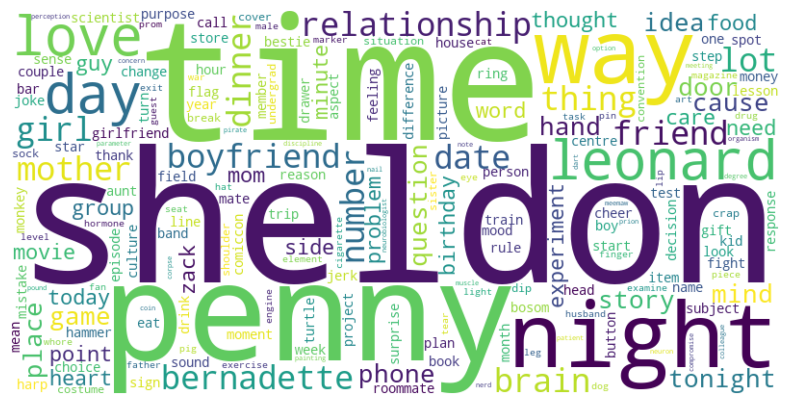

In [25]:
# make a word cloud of the nouns mentioned by Bernadette using Bernadette_noun_count
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(Amy_noun_count['noun']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

